In [1]:
# !pip install --upgrade pip
# !pip install --upgrade Pillow
# !pip install --upgrade nltk


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
from sklearn.model_selection import train_test_split
%matplotlib inline

warnings.filterwarnings('ignore')

## Data Preprocessing and Formatting

In [3]:
pd.set_option('display.max_columns', 100)
df = pd.read_csv('absatweets.csv', header = 0, error_bad_lines=False)
df = df.dropna(subset=["authorHandle"])
data = df[["id","extract","sentiment", "authorHandle"]]
df.head(100)

b'Skipping line 11798: expected 41 fields, saw 48\nSkipping line 12162: expected 41 fields, saw 48\nSkipping line 12235: expected 41 fields, saw 48\nSkipping line 13081: expected 41 fields, saw 48\nSkipping line 13853: expected 41 fields, saw 48\nSkipping line 14590: expected 41 fields, saw 48\nSkipping line 15519: expected 41 fields, saw 48\nSkipping line 15564: expected 41 fields, saw 48\nSkipping line 15622: expected 41 fields, saw 48\n'
b'Skipping line 16925: expected 41 fields, saw 48\nSkipping line 17897: expected 41 fields, saw 48\nSkipping line 18648: expected 41 fields, saw 48\nSkipping line 19129: expected 41 fields, saw 48\nSkipping line 20124: expected 41 fields, saw 48\nSkipping line 20334: expected 41 fields, saw 48\nSkipping line 20718: expected 41 fields, saw 48\nSkipping line 21059: expected 41 fields, saw 48\nSkipping line 21226: expected 41 fields, saw 48\nSkipping line 21858: expected 41 fields, saw 48\nSkipping line 22057: expected 41 fields, saw 48\nSkipping line 

,id,uri,link,title,extract,published,visibility.label,authorId,authorName,authorHandle,authorHandleId,authorPictureLink,authorProfileLink,authorBio,authorLocation,authorTimezone,replyToUri,replyToId,reshareOfUri,reshareOfId,toId,toName,toHandle,toHandleId,postExtract,relevancy,relevancyVerified,sentiment,sentimentVerified,crowdVerified,pickedUp,city.name,region.name,country.name,language.name,category.label,gender.label,race.label,engagement,OTS,tags
0,150335-1738949,http://twitter.com/x/status/1267213112358383618,http://twitter.com/WestoverAllan/statuses/1267...,NaN,Scary !,2020-05-31 23:55:24,NaN,Tx1190593437093023744,Allan Westover,WestoverAllan,1.190593e+18,https://piccache.brandseye.com/api/https%3A%2F...,https://twitter.com/WestoverAllan,husband father sports lover love travel,NaN,NaN,http://twitter.com/x/status/1267051787556728832,150335-1738334,NaN,NaN,Tx895245463,Karin Richards,Richards_Karin,8.952455e+08,Absa expects South Africa's real GDP to fall b...,RELEVANT,True,0,True,True,2020-05-31 23:55:34,NaN,NaN,NaN,English,Consumer,Male,NaN,NaN,7.0,segment:Non-CX post tag:Twitter tag:Overall co...
1,150335-1738890,http://twitter.com/x/status/1267212607519371267,http://twitter.com/LKMamabolo/statuses/1267212...,NaN,@master_nzama @AbsaSouthAfrica 😡,2020-05-31 23:53:23,NaN,Tx3299075398,Khutso M ,LKMamabolo,3.299075e+09,https://piccache.brandseye.com/api/https%3A%2F...,https://twitter.com/LKMamabolo,👨🏾‍🦲I’m an African 🌍🇿🇦,South Africa,NaN,http://twitter.com/x/status/1267120907761352705,NaN,NaN,NaN,Tx2335903797,Doctor🔥🇿🇼🇿🇦🇳🇬💉,master_nzama,2.335904e+09,NaN,RELEVANT,NaN,-1,NaN,False,2020-05-31 23:53:34,NaN,NaN,South Africa,NaN,Consumer,NaN,NaN,NaN,1751.0,tag:Engage - received tag:Engage - ticketed ta...
2,150335-1738889,http://twitter.com/x/status/1267212001819975680,http://twitter.com/HarrisMolefi/statuses/12672...,NaN,RT @Richards_Karin: Absa expects South Africa'...,2020-05-31 23:50:59,NaN,Tx1324324538,Harry,HarrisMolefi,1.324325e+09,https://piccache.brandseye.com/api/https%3A%2F...,https://twitter.com/HarrisMolefi,Agricultural Economics & Risk Management gradu...,"North West,Potchefstroom",NaN,NaN,NaN,http://twitter.com/x/status/1267051787556728832,150335-1738334,Tx895245463,Karin Richards,Richards_Karin,8.952455e+08,NaN,RELEVANT,True,0,True,True,2020-05-31 23:51:09,Potchefstroom,North-West,South Africa,English,Consumer,Male,NaN,NaN,363.0,crowd:duplicate segment:Non-conduct reshare ta...
4,150335-1738948,http://twitter.com/x/status/1267209762556575744,http://twitter.com/me_shell33/statuses/1267209...,NaN,RT @Richards_Karin: Absa expects South Africa'...,2020-05-31 23:42:05,NaN,Tx26476112,Scouse-African,me_shell33,2.647611e+07,https://piccache.brandseye.com/api/https%3A%2F...,https://twitter.com/me_shell33,nutjob | \ndemotivational speaker | \nsouth af...,NaN,NaN,NaN,NaN,http://twitter.com/x/status/1267051787556728832,150335-1738334,Tx895245463,Karin Richards,Richards_Karin,8.952455e+08,NaN,RELEVANT,True,0,True,True,2020-05-31 23:42:15,NaN,NaN,NaN,English,Consumer,NaN,NaN,NaN,396.0,crowd:duplicate segment:Non-conduct reshare ta...
5,150335-1738947,http://twitter.com/x/status/1267208331761942531,http://twitter.com/IMfaxa/statuses/12672083317...,NaN,@Wandi_Mbatha @Bingwen18 @vaultagetv @EraError...,2020-05-31 23:36:24,NaN,Tx1205047593497178113,Innocent Malcolm X Mfaxa,IMfaxa,1.205048e+18,https://piccache.brandseye.com/api/https%3A%2F...,https://twitter.com/IMfaxa,I am a truthful man & love truthful people.,"Cape Town, South Africa",NaN,http://twitter.com/x/status/1267040176620126208,NaN,NaN,NaN,Tx847151577576169474,Wandile Mbatha,Wandi_Mbatha,8.471516e+17,NaN,RELEVANT,True,-1,True,True,2020-05-31 23:36:34,Cape Town,Western Cape,South Africa,English,Consumer,Male,NaN,1.0,94.0,segment:Non-CX post tag:Twitter tag:Overall co...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,150335-1738816,http://twitter.com/

In [4]:
data

,id,extract,sentiment,authorHandle
0,150335-1738949,Scary !,0,WestoverAllan
1,150335-1738890,@master_nzama @AbsaSouthAfrica 😡,-1,LKMamabolo
2,150335-1738889,RT @Richards_Karin: Absa expects South Africa'...,0,HarrisMolefi
4,150335-1738948,RT @Richards_Karin: Absa expects South Africa'...,0,me_shell33
5,150335-1738947,@Wandi_Mbatha @Bingwen18 @vaultagetv @EraError...,-1,IMfaxa
...,...,...,...,...
66259,150335-1554305,@tysonbmhlongo @kabelodick @AdvoBarryRoux @FNB...,-1,KgMol
66260,150335-1554304,@JasonNoah_ Absa\n9357602960,0,Junior_Tlhapane
66261,150335-1554217,RT @SuperiorZulu: The PIC which is State Owned...,0,TjayFawn
66262,150335-1554216,RT @SuperiorZulu: The PIC which is State Owned...,0,Prince_Yanda


In [5]:
data['authorHandle'].value_counts()

AbsaSouthAfrica    5595
KickOffMagazine     286
Nichola14808170     190
thamisoccer1        154
Abelanang           151
                   ... 
HopolangMpho          1
Uhuru69               1
Tumi1896              1
AndrewA74676454       1
mzaykesman            1
Name: authorHandle, Length: 29140, dtype: int64

In [6]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
data.head()

,id,extract,sentiment,authorHandle
0,150335-1738949,Scary !,0,WestoverAllan
1,150335-1738890,@master_nzama @AbsaSouthAfrica 😡,-1,LKMamabolo
2,150335-1738889,RT @Richards_Karin: Absa expects South Africa'...,0,HarrisMolefi
4,150335-1738948,RT @Richards_Karin: Absa expects South Africa'...,0,me_shell33
5,150335-1738947,@Wandi_Mbatha @Bingwen18 @vaultagetv @EraError...,-1,IMfaxa


In [7]:
# remove twitter handles (@user)
data['clean_tweet'] = np.vectorize(remove_pattern)(data['extract'], "@[\w]*")
data.head()

,id,extract,sentiment,authorHandle,clean_tweet
0,150335-1738949,Scary !,0,WestoverAllan,Scary !
1,150335-1738890,@master_nzama @AbsaSouthAfrica 😡,-1,LKMamabolo,😡
2,150335-1738889,RT @Richards_Karin: Absa expects South Africa'...,0,HarrisMolefi,RT : Absa expects South Africa's real GDP to f...
4,150335-1738948,RT @Richards_Karin: Absa expects South Africa'...,0,me_shell33,RT : Absa expects South Africa's real GDP to f...
5,150335-1738947,@Wandi_Mbatha @Bingwen18 @vaultagetv @EraError...,-1,IMfaxa,You resort with insults instead of...


In [8]:
# remove special characters, numbers and punctuations
data['clean_tweet'] = data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
data.head()

,id,extract,sentiment,authorHandle,clean_tweet
0,150335-1738949,Scary !,0,WestoverAllan,Scary
1,150335-1738890,@master_nzama @AbsaSouthAfrica 😡,-1,LKMamabolo,
2,150335-1738889,RT @Richards_Karin: Absa expects South Africa'...,0,HarrisMolefi,RT Absa expects South Africa s real GDP to f...
4,150335-1738948,RT @Richards_Karin: Absa expects South Africa'...,0,me_shell33,RT Absa expects South Africa s real GDP to f...
5,150335-1738947,@Wandi_Mbatha @Bingwen18 @vaultagetv @EraError...,-1,IMfaxa,You resort with insults instead of...


In [9]:
# remove short words
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
data.head()

,id,extract,sentiment,authorHandle,clean_tweet
0,150335-1738949,Scary !,0,WestoverAllan,Scary
1,150335-1738890,@master_nzama @AbsaSouthAfrica 😡,-1,LKMamabolo,
2,150335-1738889,RT @Richards_Karin: Absa expects South Africa'...,0,HarrisMolefi,Absa expects South Africa real fall Nine point...
4,150335-1738948,RT @Richards_Karin: Absa expects South Africa'...,0,me_shell33,Absa expects South Africa real fall Nine point...
5,150335-1738947,@Wandi_Mbatha @Bingwen18 @vaultagetv @EraError...,-1,IMfaxa,resort with insults instead engaging logically...


In [10]:
data['clean_tweet'].replace('', np.nan, inplace=True)
data.dropna(subset=['clean_tweet'], inplace=True)
data = data.reset_index()
data.head()

,index,id,extract,sentiment,authorHandle,clean_tweet
0,0,150335-1738949,Scary !,0,WestoverAllan,Scary
1,2,150335-1738889,RT @Richards_Karin: Absa expects South Africa'...,0,HarrisMolefi,Absa expects South Africa real fall Nine point...
2,4,150335-1738948,RT @Richards_Karin: Absa expects South Africa'...,0,me_shell33,Absa expects South Africa real fall Nine point...
3,5,150335-1738947,@Wandi_Mbatha @Bingwen18 @vaultagetv @EraError...,-1,IMfaxa,resort with insults instead engaging logically...
4,6,150335-1738886,RT @Richards_Karin: Absa expects South Africa'...,0,LeratoMannya,Absa expects South Africa real fall Nine point...


In [11]:
# individual words considered as tokens
tokenized_tweet = data['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                              [Scary]
1    [Absa, expects, South, Africa, real, fall, Nin...
2    [Absa, expects, South, Africa, real, fall, Nin...
3    [resort, with, insults, instead, engaging, log...
4    [Absa, expects, South, Africa, real, fall, Nin...
Name: clean_tweet, dtype: object

In [12]:
ps = nltk.PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])
tokenized_tweet.head()

0                                              [scari]
1    [absa, expect, south, africa, real, fall, nine...
2    [absa, expect, south, africa, real, fall, nine...
3    [resort, with, insult, instead, engag, logic, ...
4    [absa, expect, south, africa, real, fall, nine...
Name: clean_tweet, dtype: object

In [13]:
joined_tweet = []
for i in range(len(tokenized_tweet)):
    joined_tweet.append(' '.join(tokenized_tweet[i]))

data['clean_tweet'] = joined_tweet
data.head()

,index,id,extract,sentiment,authorHandle,clean_tweet
0,0,150335-1738949,Scary !,0,WestoverAllan,scari
1,2,150335-1738889,RT @Richards_Karin: Absa expects South Africa'...,0,HarrisMolefi,absa expect south africa real fall nine point ...
2,4,150335-1738948,RT @Richards_Karin: Absa expects South Africa'...,0,me_shell33,absa expect south africa real fall nine point ...
3,5,150335-1738947,@Wandi_Mbatha @Bingwen18 @vaultagetv @EraError...,-1,IMfaxa,resort with insult instead engag logic truli u...
4,6,150335-1738886,RT @Richards_Karin: Absa expects South Africa'...,0,LeratoMannya,absa expect south africa real fall nine point ...


In [14]:
# !pip3 install wordcloud

In [15]:
data[data['sentiment'] == 1].count()

index           4241
id              4241
extract         4241
sentiment       4241
authorHandle    4241
clean_tweet     4241
dtype: int64

In [16]:
data[data['sentiment'] == 0].count()

index           44085
id              44085
extract         44085
sentiment       44085
authorHandle    44085
clean_tweet     44085
dtype: int64

In [17]:
data[data['sentiment'] == -1].count()

index           11625
id              11625
extract         11625
sentiment       11625
authorHandle    11625
clean_tweet     11625
dtype: int64

In [18]:
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)
test_data.drop(['sentiment'], axis=1)

,index,id,extract,authorHandle,clean_tweet
40922,45419,150335-1637979,"Whatever decision taken, players lives mustn't...",biza_ruu,whatev decis taken player live mustn place risk
14311,15722,150335-1707887,@SizweDhlomo @AbsaSouthAfrica is the one. Alt...,mbalizma,although they take long process credit life po...
28298,31001,150335-1671664,RT @mojapelo_naledi: People here at absa are b...,SciTheComedist,peopl here absa borrow each other mask gonna long
3425,4024,150335-1732620,RT @KickOffMagazine: Fresh after the midfield ...,melusi_zuma,fresh after midfield maestro revel about alleg...
52339,58028,150335-1579864,Vodacom sues ABSA for R5. 5 billion https://te...,Bruinou2,vodacom sue absa billion http techcentr exclus...
...,...,...,...,...,...
48047,53292,150335-1605869,RT @Munyai_R_Gundo: 2. Capitec Bank\n3. FNB\n4...,Njabulo02,capitec bank standard bank absa should just te...
16028,17653,150335-1704546,@SiyaMtitshana Bank it's transactional institu...,Carpe_Diem_ZA,bank transact institut bank with have absa sta...
1124,1314,150335-1737012,I think ABSA💀,ndux_m,think absa
54773,60677,150335-1572761,@AbsaSouthAfrica Keep safe you as well,Yash911,keep safe well


## Feature Extraction

In [19]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(train_data['clean_tweet'])
x_test = bow_vectorizer.fit_transform(test_data['clean_tweet'])

In [20]:
# bow[0].toarray()
#bow_train, x_test = train_test_split(bow, test_size=0.1, random_state=42)
#bow_train = bow[:43051]
#x_test = bow[43051:]

## Model Training & Testing

In [21]:
x_train, x_valid, y_train, y_valid = train_test_split(bow, train_data['sentiment'], random_state=42, test_size=0.25)

In [22]:
# !pip install --upgrade scikit-learn


In [23]:
# !pip uninstall scikit-learn
# !pip install scikit-learn


In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score
#from sklearn.metrics import plot_confusion_matrix

In [26]:
# training
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [27]:
# # testing
# pred = model.predict(x_test)
# print(pred)
# f1_score(y_test, pred, average = None)

In [28]:
# accuracy_score(y_test,pred)

In [29]:
# use probability to get output
pred_prob = model.predict_proba(x_valid)
pred = pred_prob[:, -1] >= 0.3
pred = pred.astype(np.int)

score = f1_score(y_valid, pred, average =None)
score

array([0.        , 0.83184538, 0.46618265])

In [30]:
accuracy_score(y_valid,pred)

0.7152494625250204

In [31]:
#plot_confusion_matrix(model, x_valid, y_valid) 

## Evaluation and visualization of results

In [32]:
pred = model.predict(x_test)
print(pred)

[0 0 0 ... 1 0 0]


In [33]:
results = pd.DataFrame(test_data)
results['sentiment'] = pred
results.head()

,index,id,extract,sentiment,authorHandle,clean_tweet
40922,45419,150335-1637979,"Whatever decision taken, players lives mustn't...",0,biza_ruu,whatev decis taken player live mustn place risk
14311,15722,150335-1707887,@SizweDhlomo @AbsaSouthAfrica is the one. Alt...,0,mbalizma,although they take long process credit life po...
28298,31001,150335-1671664,RT @mojapelo_naledi: People here at absa are b...,0,SciTheComedist,peopl here absa borrow each other mask gonna long
3425,4024,150335-1732620,RT @KickOffMagazine: Fresh after the midfield ...,0,melusi_zuma,fresh after midfield maestro revel about alleg...
52339,58028,150335-1579864,Vodacom sues ABSA for R5. 5 billion https://te...,0,Bruinou2,vodacom sue absa billion http techcentr exclus...


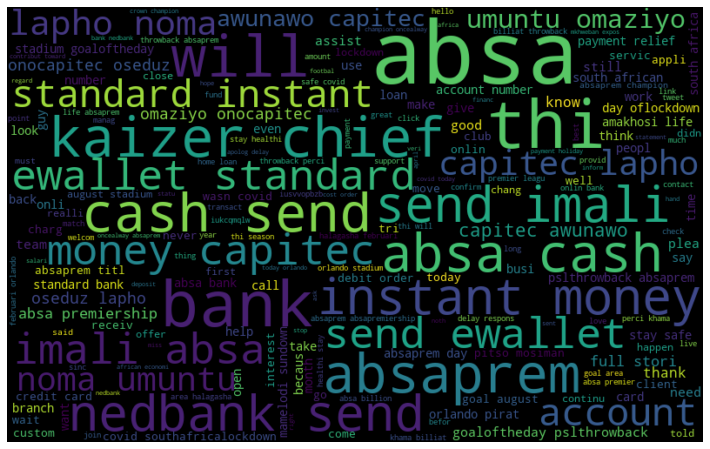

In [34]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in results['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

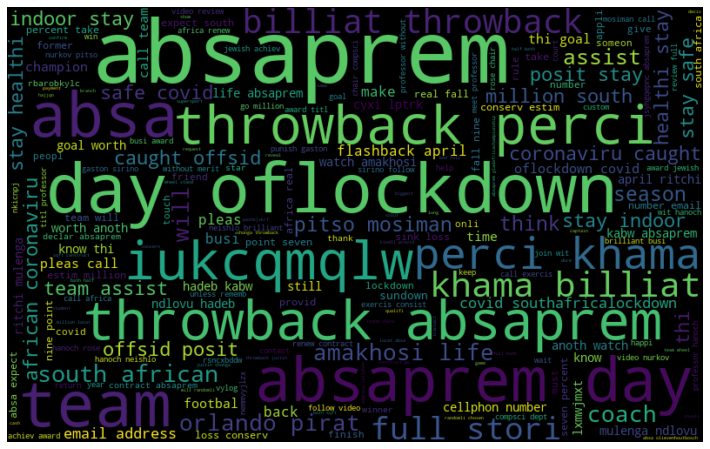

In [35]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in results['clean_tweet'][results['sentiment']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

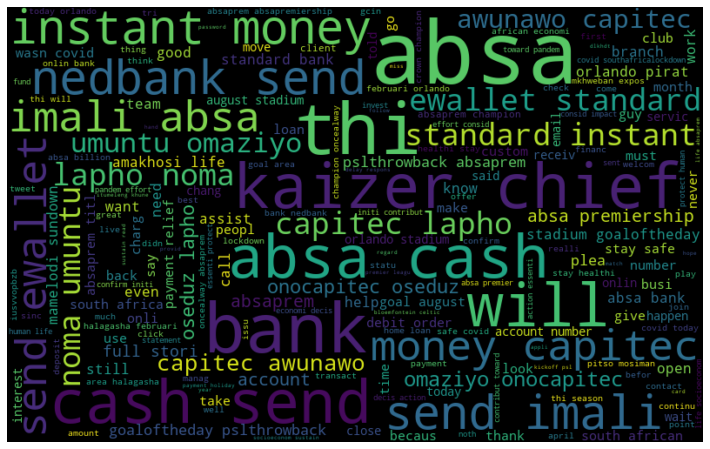

In [36]:
# frequent words visualization for neutral
all_words = " ".join([sentence for sentence in results['clean_tweet'][results['sentiment']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

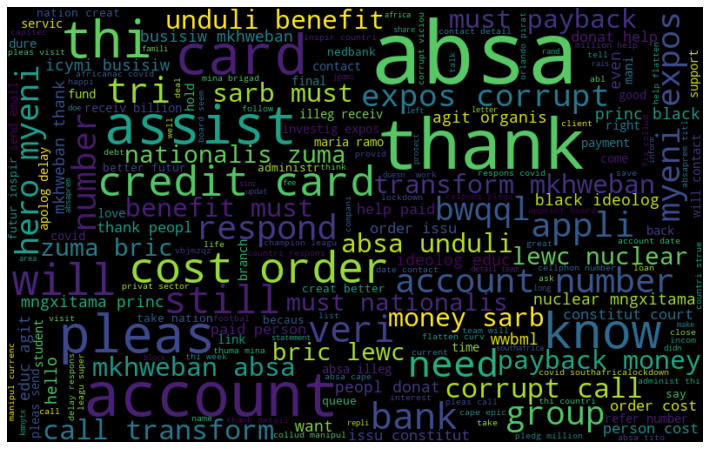

In [37]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in results['clean_tweet'][results['sentiment']==-1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [39]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(results['clean_tweet'][results['sentiment']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(results['clean_tweet'][results['sentiment']==-1])

# extract hashtags from neutral tweets
ht_neutral = hashtag_extract(results['clean_tweet'][results['sentiment']==1])

In [40]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])
ht_neutral = sum(ht_neutral, [])

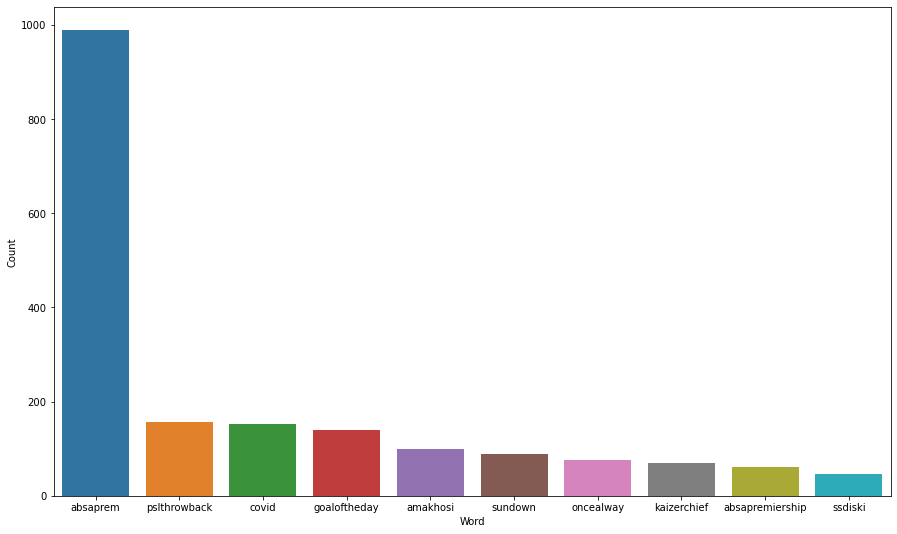

In [41]:
#frequency of positive hashtags
freq = nltk.FreqDist(ht_positive)
d_pos = pd.DataFrame({'Word': list(freq.keys()),
                 'Count': list(freq.values())})
d_pos.head(100)

# select top 10 hashtags
d_pos = d_pos.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d_pos, x='Word', y='Count')
plt.show()

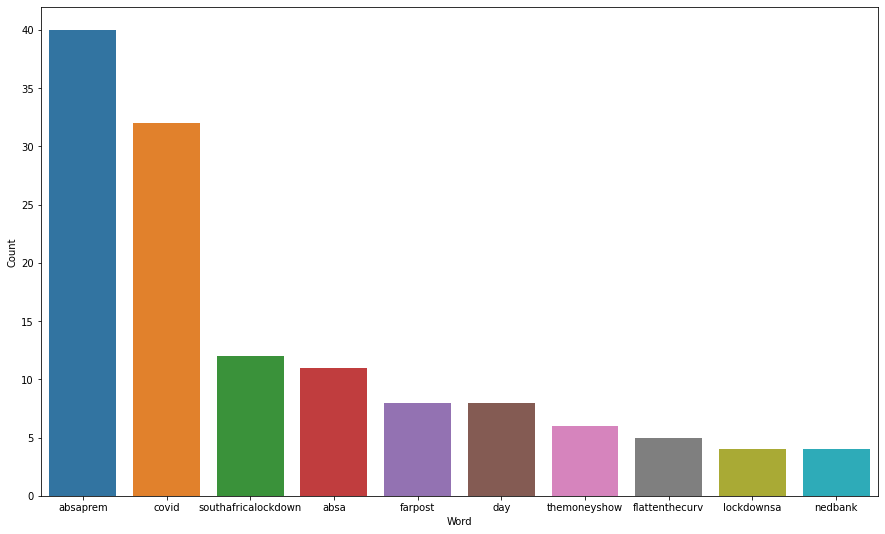

In [42]:
#frequency of negative hashtags
freq_negative = nltk.FreqDist(ht_negative)
d_neg = pd.DataFrame({'Word': list(freq_negative.keys()),
                 'Count': list(freq_negative.values())})
d_neg.head(100)

# select top 10 hashtags
d_neg = d_neg.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d_neg, x='Word', y='Count')
plt.show()

In [43]:
#display only negative tweets
neg_tweets = pd.DataFrame(results, columns=["id", "extract", "authorHandle", 'sentiment'])
neg_tweets = neg_tweets[neg_tweets['sentiment'] == -1]
neg_tweets

,id,extract,authorHandle,sentiment
4689,150335-1730313,@AbsaSouthAfrica Our branch is servicing a lot...,Sifiso01858313,-1
22126,150335-1685609,@Mazwai_99 Please visit a branch on the follow...,AbsaSouthAfrica,-1
32090,150335-1660491,@AbsaSouthAfrica My name is Richard Loleka and...,HLANGEPASIKA,-1
38788,150335-1644580,@AbsaTanzania Very well indeed. All Absa ATM’s...,Veroniq75708467,-1
3638,150335-1732312,"@tumelomaru Thank you, we have escalated the m...",AbsaSouthAfrica,-1
...,...,...,...,...
27934,150335-1672311,"@AbsaSouthAfrica Good day, \n\nI am trying to ...",keoagile_pow,-1
19055,150335-1695707,Please help @Bulelwa_Nkosi raise #$1300 (25k) ...,YouthDiplomacy,-1
14321,150335-1707792,@Brrandz @SizweDhlomo @AbsaSouthAfrica @FNBSA ...,musankosi02,-1
31929,150335-1661033,@chris_mlambo1 ABSA: R50 electricity purchased...,sthe72,-1


In [44]:
#get ratio of negative tweets per user
ratio_df = results.groupby("authorHandle")["sentiment"].apply(lambda x: (x == -1).mean()).reset_index()
ratio_df = ratio_df.rename(columns={"sentiment": "ratio"})
ratio_df['threat_level'] = pd.cut(
    ratio_df["ratio"],
    bins=[-float("inf"), 0.35, 0.45, float("inf")],
    labels=["Low", "Medium", "High"]
)
ratio_df

,authorHandle,ratio,threat_level
0,01010111000101O,0.0,Low
1,012Letsatsantsa,0.0,Low
2,01Water,0.0,Low
3,021Dames,0.0,Low
4,021Topcat15,0.0,Low
...,...,...,...
4449,zondotho,0.0,Low
4450,zonkehesewu,0.0,Low
4451,zulzieCT,0.0,Low
4452,zuzuskosana,1.0,High


In [46]:
#show only the users that are deemed potential threats
threats = ratio_df[ratio_df['threat_level'] == 'High']
threats

,authorHandle,ratio,threat_level
5,06_shoki,1.000000,High
6,07372145stix,1.000000,High
7,073TUMELO,0.666667,High
17,1dobson47,1.000000,High
22,216425261_zama,1.000000,High
...,...,...,...
4414,xoliswathegreat,1.000000,High
4420,yongs_levertte,0.500000,High
4447,zmobilefashion,1.000000,High
4452,zuzuskosana,1.000000,High
